# Regressão linear: Hiper-parâmetros da formação

O que vamos fazer?

- Comprovar o efeito dos diferentes hiper-parâmetros na formação de um modelo

## Efeito dos hiper-parâmetros

Neste laboratório não vamos introduzir nenhum conceito novo, nem implementar nenhum código que não tenhamos implementado 
noutros exercícios prévios.

O objetivo deste exercício é ter a oportunidade de comprovar como diferentes hiper-parâmetros e outras configurações afetam o nosso processo de formação.

Para isso, basta copiar as suas células de código do exercício anterior (“regressão linear: Exemplo sobre dataset sintético”), vai modificar muitas vezes os hiper-parâmetros utilizados e comprovar o seu efeito sobre a formação, bem como validar novamente a sua implementação, que irá usar em múltiplos exercícios posteriores.

Por certo, conhece já as hotkeys de JupyterLab? Irão ser muito úteis durante o curso: https://coderefinery.github.io/jupyter/02-interface/#keyboard-shortcuts

In [2]:
import time
import numpy as np
from matplotlib import pyplot as plt

## Criação do dataset sintético

Copiar a célula do exercício anterior para criar um dataset sintético, com termo de bias e de erro. Dar um valor ao termo de erro distinto a 0.

In [9]:
# TODO: Copiar aqui o código da célula correspondente, ou copiar a célula completa e eliminar esta.

# TODO: Gerar um dataset sintético, com termo de erro inicialmente a 0, sob a forma que escolher
m, n = 100, 4

# Criar uma matriz de números aleatórios no intervalo [-1, 1)
X = np.random.uniform(-1, 1, (m, n))

# Inserir um vetor de 1s como primeira coluna de X
# Dicas: np.insert(), np.ones(), índice 0, eixo 1...
X = np.insert(X, 0, 1, axis=1)
print("Primeiras 5 filas de X:'):\n", X[:5])

# Gerar um vetor de números aleatórios no intervalo [0, 1) de tamanho n + 1 (ao adicionar o termo bias
Theta_verd = np.random.rand(n + 1)
print("Theta: \n", Theta_verd)

# Gerar o vetor Y com um termo de erro aleatório em %, inicializado a 0
error = 0.5

Y = np.matmul(X, Theta_verd.T) 
Y = Y + error
print("Primeiras 10 filas de Y:\n", Y[:10])
# Verificar os valores e dimensões dos vetores
print("Dimensão de X:", X.shape)
print("Dimensão de Theta:", Theta_verd.shape)
print("Dimensão de Y:", Y.shape)
print()

Primeiras 5 filas de X:'):
 [[ 1.         -0.5702944   0.9359262  -0.7817704  -0.26991152]
 [ 1.         -0.90540007 -0.9108166  -0.51781275 -0.60762849]
 [ 1.          0.65066341 -0.63008674 -0.85450735 -0.99356493]
 [ 1.          0.91131448 -0.44122196  0.97479716 -0.37684288]
 [ 1.         -0.49671266 -0.68821685 -0.35384527 -0.6565398 ]]
Theta: 
 [0.67356703 0.68887833 0.07114965 0.21285796 0.01273299]
Primeiras 10 filas de Y:
 [0.67745157 0.36709477 1.38242477 1.97265404 0.69874757 0.96129138
 1.78540379 1.24751258 1.14573165 1.13746787]
Dimensão de X: (100, 5)
Dimensão de Theta: (5,)
Dimensão de Y: (100,)



## Formação do modelo

Copiar a célula com as funções de custo e o gradient descent e a célula que forma o modelo por gradient descent.

In [10]:
# TODO: Copiar o código das suas funções de custo e descida do gradiente

def cost_function(x, y, theta):
    
    """ Computar a função de custo para o dataset e coeficientes considerados.
    
    Argumentos posicionais:
     x -- array 2D de Numpy com os valores das variáveis independentes dos exemplos, de tamanho m x n 
    y -- array 1D Numpy com a variável dependente/objetivo, de tamanho m x 1
    theta -- array 1D Numpy com os pesos dos coeficientes do modelo, de tamanho 1 x n (vetor fila)
    
    Devolver:
     j -- float com o custo para esse array theta 
     """
    
    # Verificar se os dados estão de acordo
    if not (x.ndim == 2 and theta.ndim == 1 and y.ndim == 1): 
        return False
    
    m = len(y)

    # Calcular o produto escalar entre x e theta
    h = np.dot(x, theta.T)  # Previsões
    
    # Calculando a função de custo
    j = (1 / (2 * m)) * np.sum((h - y) ** 2)  

    return j
    

def gradient_descent(x, y, theta, alpha, e, iter):
    
    """ Formar o modelo otimizando a sua função de custo por gradient descent
    
    Argumentos posicionais:
    x -- array 2D de Numpu com os valores das variáveis independentes dos exemplos, de tamanho m x n 
    y -- array 1D Numpy com a variável dependente/objetivo, de tamanho m x 1
    theta -- array 1D Numpy com os pesos dos coeficientes do modelo, de tamanho 1 x n (vetor fila) 
    alpha -- float, ratio de formação
    
    Argumentos numerados (keyword):
    e -- float, diferença mínima entre iterações para declarar que a formação finalmente convergiu 
    iter_ -- int/float, número de iterações
    
    Devolver:
    j_hist -- list/array com a evolução da função de custo durante a formação 
    theta -- array Numpy com o valor do theta na última iteração
    
    """
    iter_ = int(iter)  # Se declarou iter_ em notação científica (1e3) ou float (1000.), converter
    
    # Inicializar j_hist como uma list ou um array Numpy. Recordar que não sabemos que tamanho terá
    j_hist = []
    
    m, n = x.shape  # Obter m e n a partir das dimensões de X
    
    for k in range(iter_):  # Iterar sobre o número máximo de iterações
        theta_iter = np.copy(theta)  # Copiar theta para atualizar
        
        for j in range(n):  # Iterar sobre n.º de características
            # Atualizar theta_iter para cada característica, de acordo com a derivada da função de custo
            # Incluir a relação de formação alfa
            theta_iter[j] = theta[j] - (alpha / (m)) * np.sum((x.dot(theta) - y) * x[:, j])
        
        theta = theta_iter
            
        cost = cost_function(x, y, theta)  # Calcular o custo para a atual iteração theta
            
        j_hist.append(cost)  # Adicionar o custo da iteração atual ao histórico de custos
        
        # Comprovar se a diferença entre o custo da iteração atual e o custo da última iteração em valor 
        # absoluto são inferiores que a diferença mínima para declarar a convergência
        if k > 0 and abs(j_hist[-1] - j_hist[-2]) < e:
            print('Convergir na iteração n.º: ', k)
            break
    else:
        print('N.º máx. de iterações alcançado')
        
    return j_hist, theta

## Comprovar a formação do modelo

Copiar a célula que representa graficamente o histórico da função de custo do seu modelo.

Theta inicial:
[5.2, 3.6, 1.7, 0.4, 3.8]
Hiper-parâmetros a utilizar:
Convergir na iteração n.º:  121
Tempo de formação (s): 0.03652310371398926

Últimos 10 valores da função de custo
[0.0026837233589290543, 0.0025245974844594586, 0.0023750089920691895, 0.0022343792252540514, 0.002102165136154736, 0.0019778570577151725, 0.0018609766179499554, 0.0017510747870513699, 0.001647730048686715, 0.0015505466874138746]

Custo final:
0.00155
Valores verdadeiros de Theta e diferença com valores formados:

Theta final: [1.18 0.7  0.1  0.24 0.11]
Theta_verd: [0.67 0.69 0.07 0.21 0.01]
Diferença de Thetas:  [0.5  0.01 0.03 0.03 0.09]


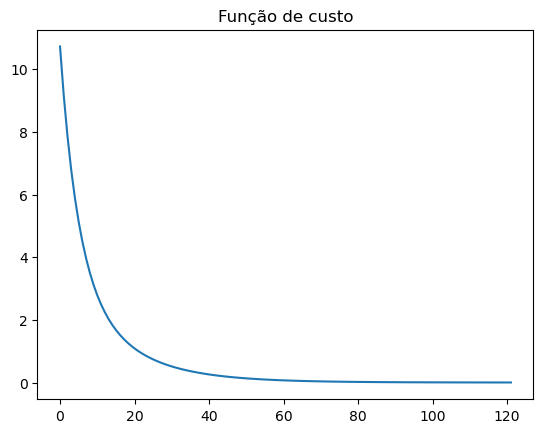

In [12]:
# TODO: Formar o seu modelo ML otimizando os seus coeficientes theta por gradient descent

# Inicializar theta com n + 1 valores aleatórios
theta_ini = [5.2, 3.6, 1.7, 0.4, 3.8]

print('Theta inicial:') 
print(theta_ini)

alpha = 1e-1 
e = 1e-4
iter_ = 1e6

print('Hiper-parâmetros a utilizar:')

t = time.time()
j_hist, theta = gradient_descent(X, Y, theta_ini, alpha, e, iter_)

print('Tempo de formação (s):', time.time() - t)

# TODO: completar
print('\nÚltimos 10 valores da função de custo') 
print(j_hist[-10:])
print('\nCusto final:') 
print(round(j_hist[-1], 5)) 

print('Valores verdadeiros de Theta e diferença com valores formados:') 
print('\nTheta final:', np.round(theta, 2)) 
print("Theta_verd:", np.round(Theta_verd, 2))
print("Diferença de Thetas: ", np.round(theta - Theta_verd, 2))

plt.figure(1)

plt.title('Função de custo') 

plt.plot(range(len(j_hist)), j_hist) # Completar a função

plt.show()

## Avaliação do modelo

Copiar a célula que calcula e representa graficamente os resíduos do seu modelo.

Adicionar a essa célula o cálculo do Y previsto (Y_pred) da célula anterior, já que sem essa variável o seu código não irá 
funcionar corretamente

y_pred [0.65527299 0.2639536  1.25621805 1.96466166 0.60607908 1.01310212
 1.82367903 1.22010541 1.17516388 1.09701759]
Residuos: [-0.02217858 -0.10314117 -0.12620672 -0.00799238 -0.09266849  0.05181074
  0.03827524 -0.02740717  0.02943223 -0.04045028]


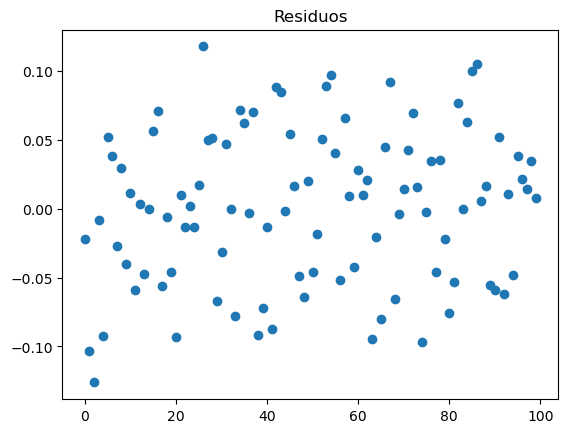

In [15]:
y_pred = X @ theta
print("y_pred", y_pred[:10])

residuos = y_pred - Y
print("Residuos:", residuos[:10])

plt.figure(2)

plt.title('Residuos') 

plt.scatter(range(len(residuos)), residuos)

plt.show()

## Modificar os hiper-parâmetros e comprovar o seu efeito.

Agora proceder à modificação a cada um dos diferentes hiper-parâmetros e como um conjunto e comprovar o seu efeito. Os 
hiper-parâmetros de formação e outros parâmetros de configuração que vamos modificar são os seguintes:
1. m e n
1. Termo de erro do dataset, erro
1. Ratio de formação, alfa
1. Parâmetro de convergência, e
1. Número máximo de iterações

Queremos que nesta tarefa seja o mais autónomo possível, que dedique este tempo para poder experimentar, descobrir por si próprio o comportamento desses parâmetros, para aprender a modificá-los no futuro, quando precisarmos de os modificar para otimizar a formação de modelos mais complexos.

Então, porque não aproveitar para desfrutar e descobrir por si próprio o que pode acontecer quando os modificamos, tanto 
individualmente como um conjunto?

Quando estiver pronto para continuar, pode passar para a secção final

## Modificação dos hiper-parâmetros: perguntas e conclusões

Como objetivo de avaliação do exercício, vamos incluir algumas perguntas simples para que possa responder em função das suas 
apreciações no ponto anterior. Pode modificar esta célula de markdown e adicionar as suas respostas às mesmas.

1. O que acontece quando aumentamos o número de exemplos?
1. Como é que isso afeta o tempo de formação?
1. Como é que afeta a precisão ou o custo final do modelo?
1. O que acontece quando aumentamos o número de características? Como afeta o tempo de formação e a precisão do modelo?
1. Como é que o termo de erro afeta a sua formação? A sua precisão, o número de iterações até convergir...
1. Como o número máximo de iterações afeta a formação? Tem alguma coisa a ver com o tempo de formação, precisão final, etc.?
1. Existe um limite para o número máximo de iterações? Podemos aumentar este número até ao infinito para conseguir, por exemplo,melhorar a precisão?
1. O número máximo de iterações e o parâmetro de convergência da formação estão relacionados?
1. O parâmetro de convergência e o custo final do modelo estão relacionados?
1. Como é que o ratio de formação afeta o modelo? Será que afeta a sua velocidade, a sua precisão?
1. Podemos aumentar a taxa de formação para o infinito? Há algum limite para além do qual deixe de funcionar, tanto em valor máximo como mínimo?

Curiosidades: vamos testar o seu ambiente de trabalho atual. Irá dar-nos uma ideia do seu poder, mas também uma referência 
para si, para o recordar no futuro e para conhecer os seus limites:
1. Qual é o número máximo de exemplos e características que os seus recursos do seu ambiente de trabalho atual admitem? Fazer vários testes, e quando alcançar o limite das características, modificar o número de exemplos. Tirar cerca de 3 pontos de combinações de ambos os valores acima dos quais o seu ambiente lhe irá dar um erro de recurso.


1. Ter uma ideia do tempo de formação necessário para um modelo típico no seu ambiente para um algoritmo básico, tal como a regressão linear. Com um termo de erro de 15%, um limite de iterações, ratio de aprendizagem e um parâmetro de convergência suficiente, anotar o tempo que demora o seu equipamento a formar o modelo. Tentar vários valores para o número de exemplos e características, por exemplo, tamanho do dataset “pequeno”, “médio” e “grande”.


Por último, há alguma conclusão adicional que tenha descoberto e que não esteja incluída nas perguntas anteriores? Aguardamos com expetativa a sua resposta!